# Sensor Data Analysis

The notebook showcases a real-world case using time series data analysis on sensor data. Time series forecasting occurs when you make scientific predictions based on historical time stamped data. It involves building models through historical analysis and using them to make observations and drive future strategic decision-making.

The data set used here has been collected by the team members (Anshika Gupta, Reuben Coutinho, Rhea Rodrigues and Ankita Tripathi)

The notebook structure can be observed as:
1. Data preparation and Cleaning
2. Exploratory Data Analysis
3. Kmeans Clustering
4. Testing and results


Resources and references:
1. https://www.tableau.com/learn/articles/time-series-forecasting#:~:text=Time%20series%20forecasting%20occurs%20when,drive%20future%20strategic%20decision%2Dmaking
2. https://towardsdatascience.com/time-series-clustering-deriving-trends-and-archetypes-from-sequential-data-bb87783312b4#:~:text=Time%20Series%20Clustering%20is%20an,and%20minimize%20it%20across%20clusters.
3. https://towardsdatascience.com/how-to-apply-k-means-clustering-to-time-series-data-28d04a8f7da3
4. https://towardsdatascience.com/exploratory-sensor-data-analysis-in-python-3a26d6931e67

5. Code: https://www.knime.com/blog/time-series-temperature-prediction-iot-sensors

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Getting the Data

The dataset can be loaded in 2 ways:
1. Using the Google sheets API through the auth token
2. Directly uploading the csv file 

#### Way 1: Using the Google sheets API through the auth token

In [ ]:
import gspread 
from oauth2client.service_account import ServiceAccountCredentials

In [ ]:
# define the scope
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']

# add credentials to the account
creds = ServiceAccountCredentials.from_json_keyfile_name('weatherdataanalysis-86eab15d29a4.json', scope)

# authorize the clientsheet 
client = gspread.authorize(creds)

FileNotFoundError: ignored

In [ ]:
# get the instance of the Spreadsheet
sheet = client.open('WeatherData')

# get the first sheet of the Spreadsheet
sheet_instance = sheet.get_worksheet(0)

NameError: ignored

In [ ]:
sheet_instance.col_count

In [ ]:
records = sheet_instance.get_all_records()

In [ ]:
records

#### Way 2: Direct upload from csv file

In [ ]:
records = pd.read_csv("WeatherData - WeatherData.csv")
records

,Entry No.,Date and Time,temperature (C),humidity (%),heat index (C),pressure (Pa),altitude (m),lightDensity (V),UV Intensity (mW/cm^2)
0,1,2022-02-08T14:50:05.894Z,nan,nan,nan,101070,21.25,4095,-0.79
1,2,2022-02-08T14:50:50.935Z,28.4,67,31.01,101067,21.42,4095,-0.88
2,3,2022-02-08T14:51:20.795Z,28.4,64.3,30.63,101067,21.75,4095,-0.99
3,4,2022-02-08T14:56:24.488Z,28.4,66,30.87,101069,21.09,0,-0.64
4,5,2022-02-08T15:01:28.189Z,28.1,65.2,30.23,101073,20.84,13,-0.68
...,...,...,...,...,...,...,...,...,...
1062,1063,2022-03-17T07:07:03.292Z,31.9,53.7,35.09,100465,72.18,243,1.14
1063,1064,2022-03-17T07:12:06.787Z,31.9,53.3,34.99,100457,72.77,240,1.16
1064,1065,2022-03-17T07:17:10.583Z,32.9,52.4,36.79,100444,73.36,252,1.17
1065,1066,2022-03-17T07:22:14.088Z,33.6,51,37.85,100446,73.11,240,1.18


###Data Preparation and Cleaning

In [ ]:
# convert the json to dataframe
records_df = pd.DataFrame.from_dict(records)

# view the top records
records_df

,Entry No.,Date and Time,temperature (C),humidity (%),heat index (C),pressure (Pa),altitude (m),lightDensity (V),UV Intensity (mW/cm^2)
0,1,2022-02-08T14:50:05.894Z,nan,nan,nan,101070,21.25,4095,-0.79
1,2,2022-02-08T14:50:50.935Z,28.4,67,31.01,101067,21.42,4095,-0.88
2,3,2022-02-08T14:51:20.795Z,28.4,64.3,30.63,101067,21.75,4095,-0.99
3,4,2022-02-08T14:56:24.488Z,28.4,66,30.87,101069,21.09,0,-0.64
4,5,2022-02-08T15:01:28.189Z,28.1,65.2,30.23,101073,20.84,13,-0.68
...,...,...,...,...,...,...,...,...,...
1062,1063,2022-03-17T07:07:03.292Z,31.9,53.7,35.09,100465,72.18,243,1.14
1063,1064,2022-03-17T07:12:06.787Z,31.9,53.3,34.99,100457,72.77,240,1.16
1064,1065,2022-03-17T07:17:10.583Z,32.9,52.4,36.79,100444,73.36,252,1.17
1065,1066,2022-03-17T07:22:14.088Z,33.6,51,37.85,100446,73.11,240,1.18


In [ ]:
records_df.columns

Index(['Entry No.', 'Date and Time', 'temperature (C)', 'humidity (%)',
       'heat index (C)', 'pressure (Pa)', 'altitude (m)', 'lightDensity (V)',
       'UV Intensity (mW/cm^2)'],
      dtype='object')

In [ ]:
selected_columns = ['Date and Time', 'temperature (C)', 'humidity (%)',
       'heat index (C)', 'pressure (Pa)', 'altitude (m)', 'lightDensity (V)',
       'UV Intensity (mW/cm^2)']

len(selected_columns)

8

Extracting a copy of the data from these columns into a new data frame weather_df, which we can continue to modify further without affecting the original data frame.

In [ ]:
weather_df = records_df[selected_columns].copy()
weather_df.dropna(inplace=True)
weather_df.shape

(1067, 8)

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 0 to 1066
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date and Time           1067 non-null   object 
 1   temperature (C)         1067 non-null   object 
 2   humidity (%)            1067 non-null   object 
 3   heat index (C)          1067 non-null   object 
 4   pressure (Pa)           1067 non-null   int64  
 5   altitude (m)            1067 non-null   float64
 6   lightDensity (V)        1067 non-null   int64  
 7   UV Intensity (mW/cm^2)  1067 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 75.0+ KB


The sensor data we have is observed to be of data type `float` but is recognised as `object`. 

We'll need to adjust the data type for each column on a case-by-case basis.

Here, we can change all required columns to `float` in one go.

> Slicing the required columns from complete df

In [ ]:
weather_df.iloc[:,1:]

,temperature (C),humidity (%),heat index (C),pressure (Pa),altitude (m),lightDensity (V),UV Intensity (mW/cm^2)
0,nan,nan,nan,101070,21.25,4095,-0.79
1,28.4,67,31.01,101067,21.42,4095,-0.88
2,28.4,64.3,30.63,101067,21.75,4095,-0.99
3,28.4,66,30.87,101069,21.09,0,-0.64
4,28.1,65.2,30.23,101073,20.84,13,-0.68
...,...,...,...,...,...,...,...
1062,31.9,53.7,35.09,100465,72.18,243,1.14
1063,31.9,53.3,34.99,100457,72.77,240,1.16
1064,32.9,52.4,36.79,100444,73.36,252,1.17
1065,33.6,51,37.85,100446,73.11,240,1.18


In [ ]:
weather_df.iloc[:,1:] = weather_df.iloc[:,1:].apply(pd.to_numeric, errors='coerce')
weather_df.dropna(inplace=True)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 1 to 1066
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date and Time           1064 non-null   object 
 1   temperature (C)         1064 non-null   float64
 2   humidity (%)            1064 non-null   float64
 3   heat index (C)          1064 non-null   float64
 4   pressure (Pa)           1064 non-null   int64  
 5   altitude (m)            1064 non-null   float64
 6   lightDensity (V)        1064 non-null   int64  
 7   UV Intensity (mW/cm^2)  1064 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 74.8+ KB


## Exploratory Data Analysis
The dataframe is now examined for statistical parameters like mean, median, mode, standard deviation, variance, among others for each of the columns.


In [ ]:
weather_df.describe()

,temperature (C),humidity (%),heat index (C),pressure (Pa),altitude (m),lightDensity (V),UV Intensity (mW/cm^2)
count,1064.000000,1064.000000,1064.00000,1064.000000,1064.000000,1064.000000,1064.000000
mean,28.844173,54.856673,30.30281,101488.956767,6.314502,2291.834586,-0.048327
std,4.254609,11.612698,5.62907,10327.545741,557.612123,1974.166549,1.107169
min,20.200000,29.900000,20.50000,100152.000000,-9060.410000,0.000000,-0.990000
25%,26.175000,46.600000,26.98250,100702.750000,24.487500,98.000000,-0.650000
50%,29.200000,53.300000,30.23500,100861.000000,38.660000,4095.000000,-0.400000
75%,31.200000,59.700000,33.12500,101032.250000,51.750000,4095.000000,0.020000
max,42.700000,85.900000,53.46000,269233.000000,97.870000,4095.000000,19.140000


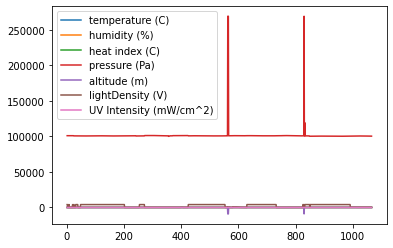

In [ ]:
# weather_df["temperature (C)"].plot()
weather_df.plot()

As we can observe, the data scales for all the data columns vary tremendously hence making it difficult to compare the values and identifying corelation. 

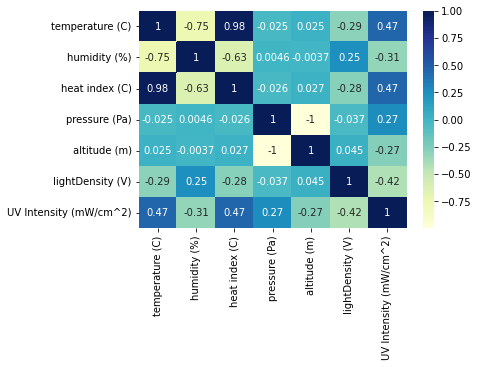

In [ ]:
correlations = weather_df.corr()
sns.heatmap(correlations, cmap="YlGnBu", annot=True)

### Correlations we found
1. Strong positive :
  - temperature / UV intensity
  - temperature / heat index
  - heat index / UV intensity
  - pressure / UV intensity
2. Strong negative :
  - pressure / altitude
  - temperature / humidity
3. Moderate positive : 
  - temperature / pressure
  - humidity / altitude
  - heat index / pressure
  - altitude / light density

In [ ]:
pip install distfit

In [ ]:
from distfit import distfit

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0580335] [loc=28.844 scale=4.253]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.1299931] [loc=20.200 scale=8.644]
[distfit] >[pareto    ] [0.07 sec] [RSS: 0.1509591] [loc=-0.052 scale=20.252]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 0.0460657] [loc=29.246 scale=3.253]
[distfit] >[t         ] [0.07 sec] [RSS: 0.0539391] [loc=28.889 scale=3.667]
[distfit] >[genextreme] [0.09 sec] [RSS: 0.0645176] [loc=27.204 scale=4.180]
[distfit] >[gamma     ] [0.07 sec] [RSS: 0.0597545] [loc=-46.327 scale=0.241]
[distfit] >[lognorm   ] [0.18 sec] [RSS: 0.0597365] [loc=-82.949 scale=111.713]
[distfit] >[beta      ] [0.11 sec] [RSS: 0.0596906] [loc=-39.090 scale=583.129]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.1160050] [loc=20.200 scale=22.500]
[distfit] >[loggamma  ] [0.12 sec] [RSS: 0.0578618] [loc=-1210.181 scale=168.600]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


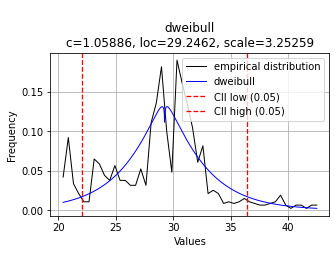

In [ ]:
dist = distfit()
dist.fit_transform(weather_df["temperature (C)"])
dist.plot(figsize=(5,3));

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0060421] [loc=54.857 scale=11.607]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0173748] [loc=29.900 scale=24.957]
[distfit] >[pareto    ] [0.08 sec] [RSS: 0.0238187] [loc=-0.084 scale=29.984]
[distfit] >[dweibull  ] [0.03 sec] [RSS: 0.0045761] [loc=53.949 scale=9.570]
[distfit] >[t         ] [0.06 sec] [RSS: 0.0060417] [loc=54.856 scale=11.607]
[distfit] >[genextreme] [0.15 sec] [RSS: 0.0048464] [loc=49.897 scale=9.920]
[distfit] >[gamma     ] [0.01 sec] [RSS: 0.0049681] [loc=19.973 scale=3.820]
[distfit] >[lognorm   ] [0.08 sec] [RSS: 0.0048714] [loc=7.345 scale=46.154]
[distfit] >[beta      ] [0.13 sec] [RSS: 0.0049684] [loc=19.888 scale=169998.133]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0127696] [loc=29.900 scale=56.000]
[distfit] >[loggamma  ] [0.12 sec] [RSS: 0.0061558] [loc=-4142.938 scale=547.928]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


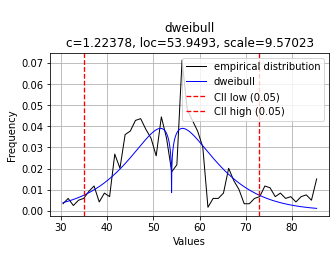

In [ ]:
dist = distfit()
dist.fit_transform(weather_df["humidity (%)"])
dist.plot(figsize=(5,3));

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0404574] [loc=30.303 scale=5.626]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0707960] [loc=20.500 scale=9.803]
[distfit] >[pareto    ] [0.08 sec] [RSS: 0.0830964] [loc=-0.054 scale=20.554]
[distfit] >[dweibull  ] [0.07 sec] [RSS: 0.0274798] [loc=30.230 scale=3.991]
[distfit] >[t         ] [0.06 sec] [RSS: 0.0404553] [loc=30.303 scale=5.626]
[distfit] >[genextreme] [0.10 sec] [RSS: 0.0450158] [loc=27.940 scale=5.008]
[distfit] >[gamma     ] [0.04 sec] [RSS: 0.0441002] [loc=10.628 scale=1.595]
[distfit] >[lognorm   ] [0.29 sec] [RSS: 0.0437696] [loc=0.755 scale=29.031]
[distfit] >[beta      ] [0.09 sec] [RSS: 0.0441002] [loc=10.628 scale=37411196.160]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0793218] [loc=20.500 scale=32.960]
[distfit] >[loggamma  ] [0.09 sec] [RSS: 0.0404884] [loc=-1042.730 scale=160.487]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


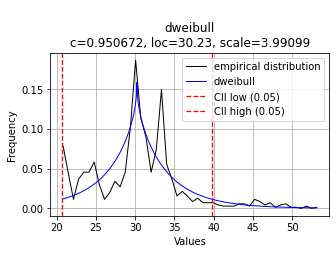

In [ ]:
dist = distfit()
dist.fit_transform(weather_df["heat index (C)"])
dist.plot(figsize=(5,3));

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0000234] [loc=6.315 scale=557.350]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0000294] [loc=-9060.410 scale=9066.725]
[distfit] >[pareto    ] [0.05 sec] [RSS: 0.0000302] [loc=-9062.025 scale=1.615]
[distfit] >[dweibull  ] [0.08 sec] [RSS: 0.0000030] [loc=21.590 scale=24.012]
[distfit] >[t         ] [0.07 sec] [RSS: 0.0000011] [loc=38.568 scale=16.859]
[distfit] >[genextreme] [0.20 sec] [RSS: 0.0000047] [loc=22.077 scale=90.516]
[distfit] >[gamma     ] [0.10 sec] [RSS: 0.0000269] [loc=1.580 scale=1.649]
[distfit] >[lognorm   ] [0.19 sec] [RSS: 0.0000298] [loc=-9060.410 scale=2.340]
[distfit] >[beta      ] [0.09 sec] [RSS: 0.0000057] [loc=-56733.999 scale=56831.869]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0000290] [loc=-9060.410 scale=9158.280]
[distfit] >[loggamma  ] [0.04 sec] [RSS: 0.0000003] [loc=81.934 scale=8.220]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


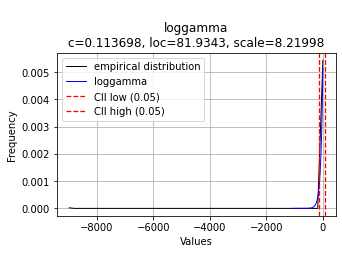

In [ ]:
dist = distfit()
dist.fit_transform(weather_df["altitude (m)"])
dist.plot(figsize=(5,3));

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0000532] [loc=2291.835 scale=1973.239]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0000518] [loc=0.000 scale=2291.835]
[distfit] >[pareto    ] [0.05 sec] [RSS: 0.0000445] [loc=-3.640 scale=3.640]
[distfit] >[dweibull  ] [0.05 sec] [RSS: 0.0000182] [loc=2078.884 scale=2017.646]
[distfit] >[t         ] [0.06 sec] [RSS: 0.0000466] [loc=74.079 scale=140.658]
[distfit] >[genextreme] [0.17 sec] [RSS: 0.0000407] [loc=2610.611 scale=2266.062]
[distfit] >[gamma     ] [0.07 sec] [RSS: 0.0000532] [loc=-32568.178 scale=112.498]
[distfit] >[lognorm   ] [0.16 sec] [RSS: 0.0000464] [loc=-0.000 scale=7.085]
[distfit] >[beta      ] [0.45 sec] [RSS: 0.0000317] [loc=-750.399 scale=4845.399]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0000518] [loc=0.000 scale=4095.000]
[distfit] >[loggamma  ] [0.06 sec] [RSS: 0.0000502] [loc=4095.000 scale=0.000]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


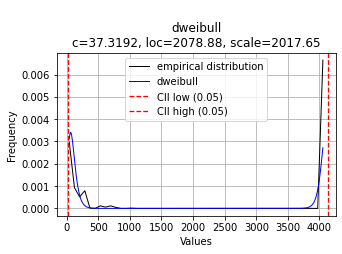

In [ ]:
dist = distfit()
dist.fit_transform(weather_df["lightDensity (V)"])
dist.plot(figsize=(5,3));

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.6591061] [loc=-0.048 scale=1.107]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0536551] [loc=-0.990 scale=0.942]
[distfit] >[pareto    ] [0.06 sec] [RSS: 0.0374237] [loc=-1.922 scale=0.932]
[distfit] >[dweibull  ] [0.14 sec] [RSS: 0.7027591] [loc=-0.140 scale=0.607]
[distfit] >[t         ] [0.03 sec] [RSS: 0.4905136] [loc=-0.498 scale=0.268]
[distfit] >[genextreme] [0.08 sec] [RSS: 0.2379924] [loc=-0.517 scale=0.305]
[distfit] >[gamma     ] [0.09 sec] [RSS: 0.6247961] [loc=-0.990 scale=1.153]
[distfit] >[lognorm   ] [0.06 sec] [RSS: 0.1497986] [loc=-1.000 scale=0.669]
[distfit] >[beta      ] [0.15 sec] [RSS: 0.1514195] [loc=-0.991 scale=723508609.888]
[distfit] >[uniform   ] [0.00 sec] [RSS: 1.4165735] [loc=-0.990 scale=20.130]
[distfit] >[loggamma  ] [0.10 sec] [RSS: 0.6812197] [loc=-531.047 scale=65.818]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


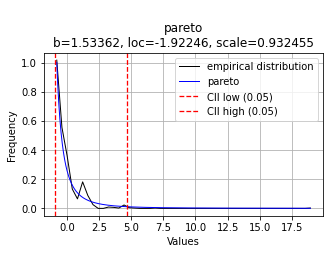

In [ ]:
dist = distfit()
dist.fit_transform(weather_df["UV Intensity (mW/cm^2)"])
dist.plot(figsize=(5,3));

[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0580335] [loc=28.844 scale=4.253]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.1299931] [loc=20.200 scale=8.644]
[distfit] >[pareto    ] [0.07 sec] [RSS: 0.1509591] [loc=-0.052 scale=20.252]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 0.0460657] [loc=29.246 scale=3.253]
[distfit] >[t         ] [0.08 sec] [RSS: 0.0539391] [loc=28.889 scale=3.667]
[distfit] >[genextreme] [0.09 sec] [RSS: 0.0645176] [loc=27.204 scale=4.180]
[distfit] >[gamma     ] [0.07 sec] [RSS: 0.0597545] [loc=-46.327 scale=0.241]
[distfit] >[lognorm   ] [0.18 sec] [RSS: 0.0597365] [loc=-82.949 scale=111.713]
[distfit] >[beta      ] [0.12 sec] [RSS: 0.0596906] [loc=-39.090 scale=583.129]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.1160050] [loc=20.200 scale=22.500]
[distfit] >[loggamma  ] [0.11 sec] [RSS: 0.0578618] [loc=-1210.181 scale=168.600]
[distfit] >Compute confidence interval [paramet

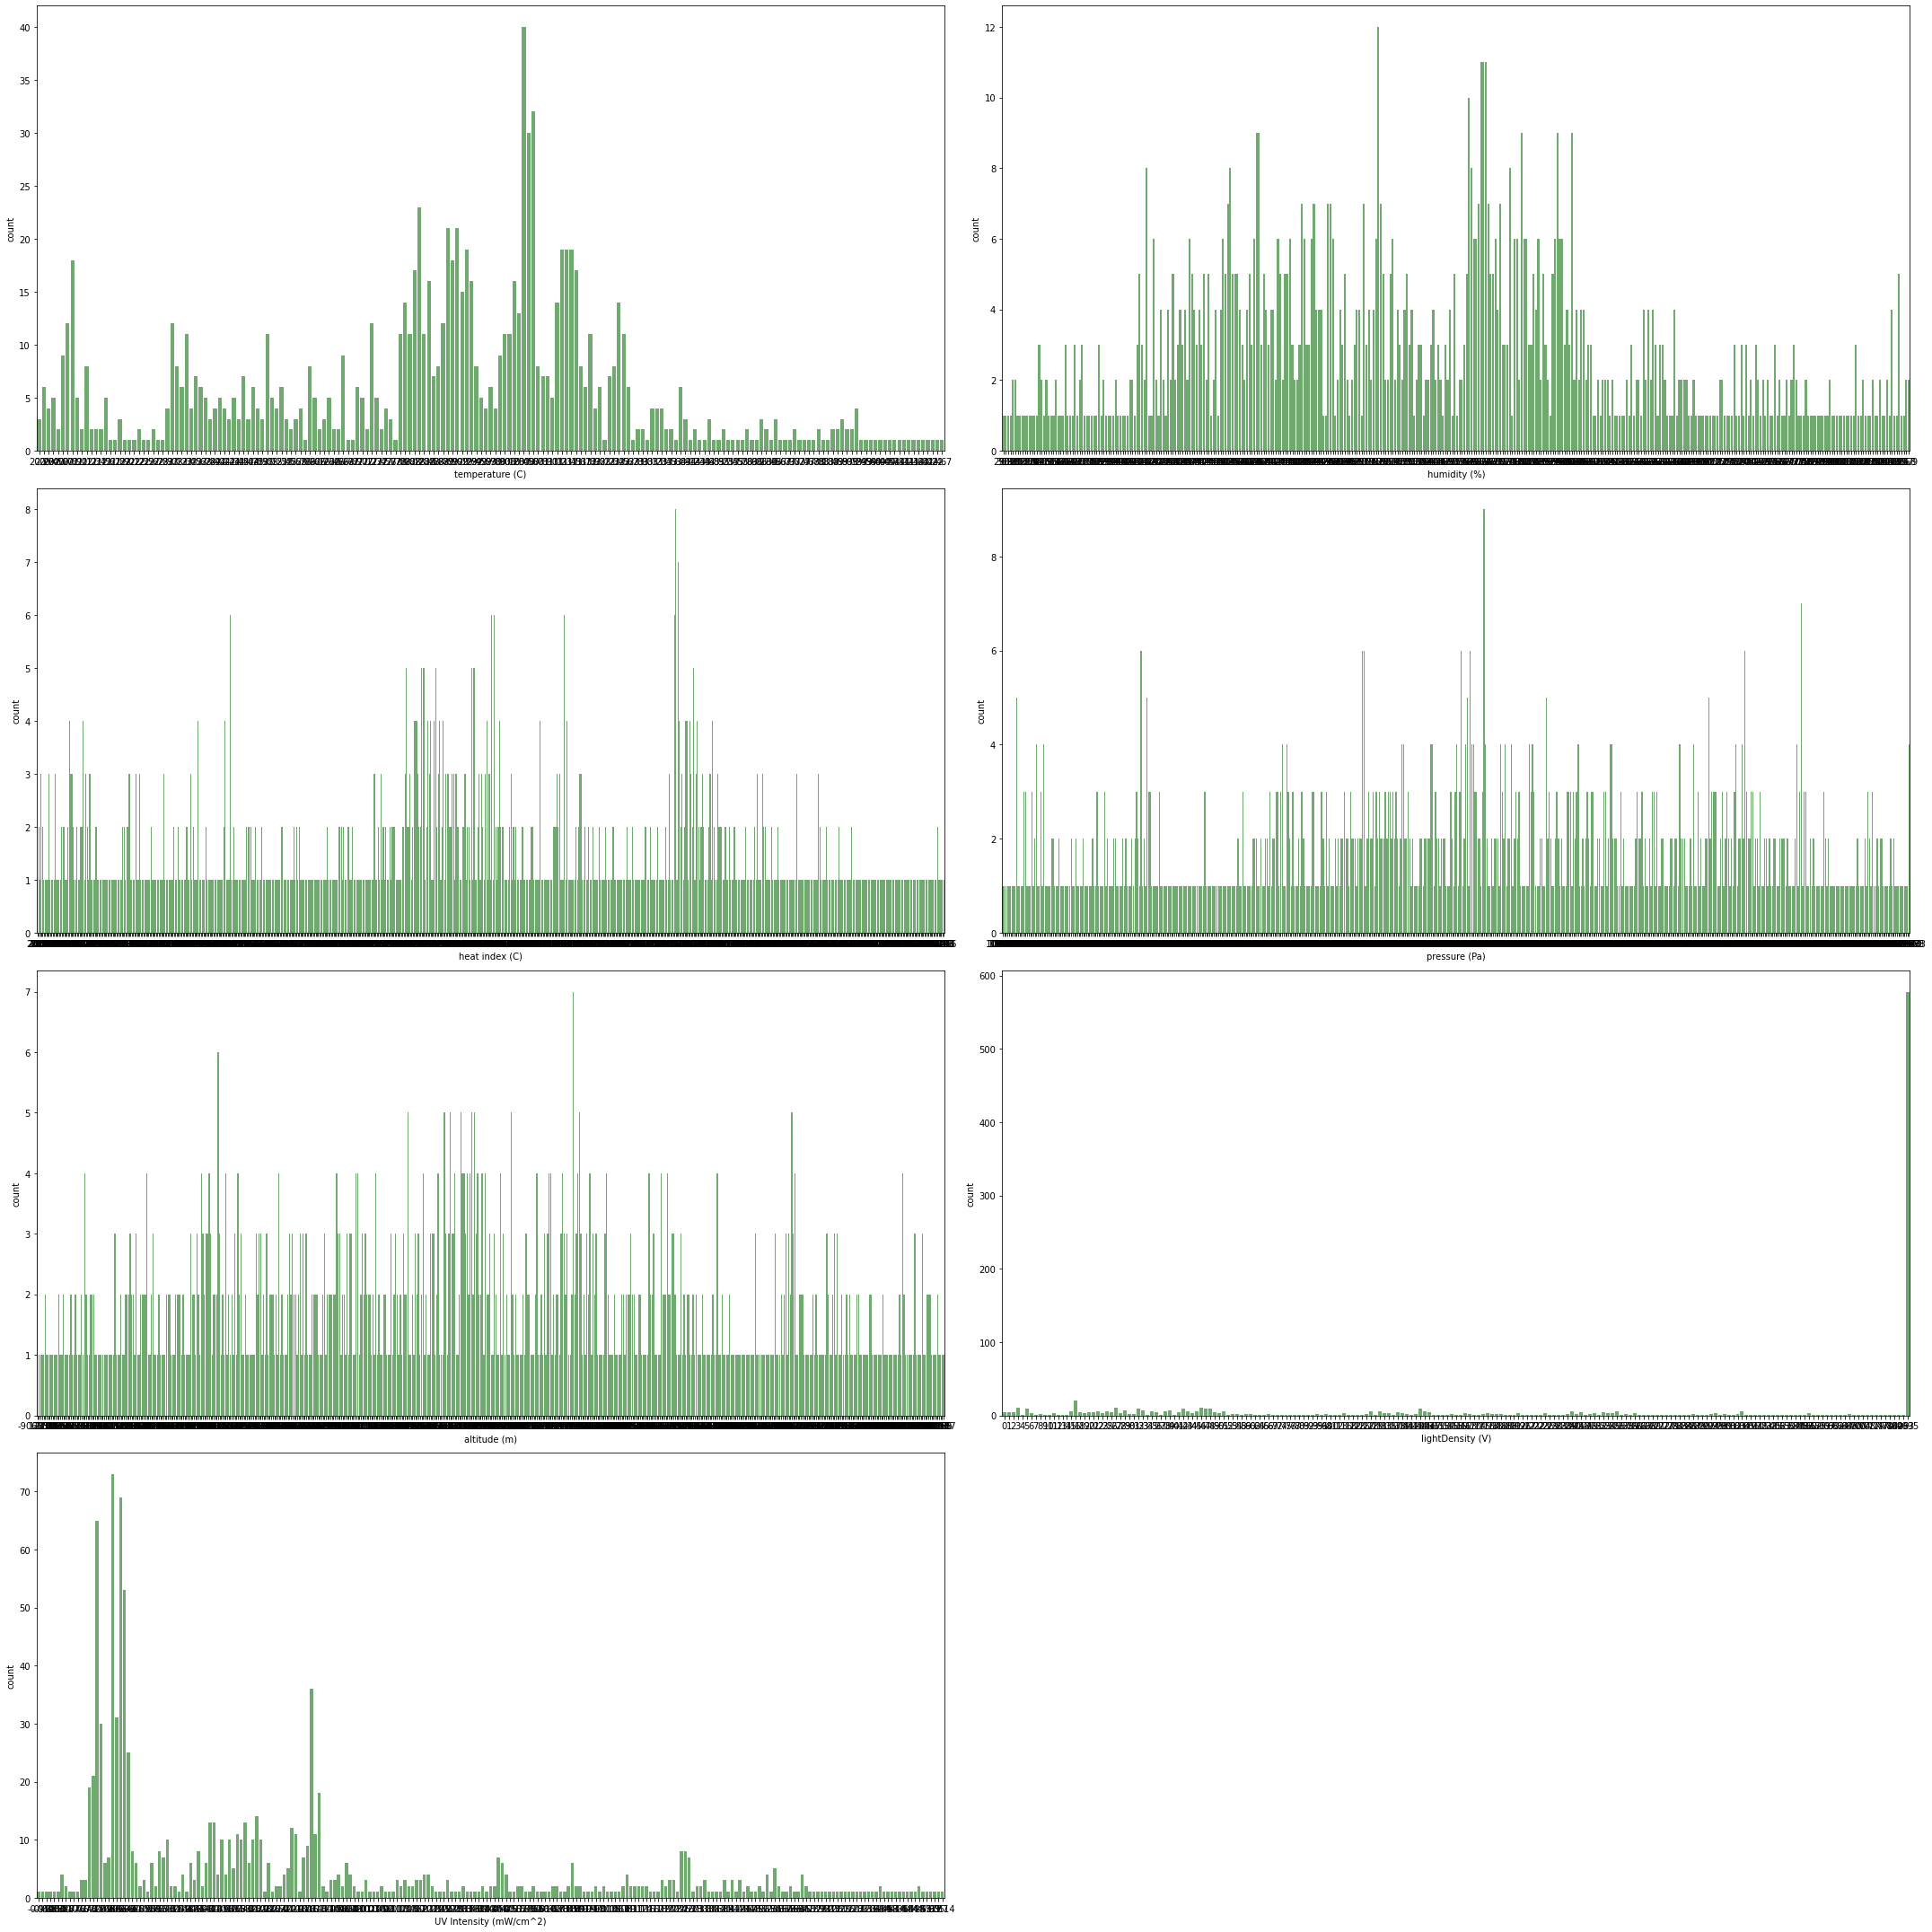

In [ ]:
plt.figure(figsize=[30,30])

n=1

for i in selected_columns[1:]:
  plt.subplot(4,2,n)
  
  dist.fit_transform(weather_df[i])
  sns.countplot(x=i, alpha=0.6, color='g',data=weather_df)
  # dist.plot(figsize=(5,3));
  n=n+1

plt.tight_layout()
plt.show()

## Kmeans on Light Density and Altitude

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. 



In [ ]:
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [ ]:
weather_df = weather_df.loc[weather_df["altitude (m)"] >0 ]
weather_df = weather_df.loc[weather_df["pressure (Pa)"] <150000 ]
# print(weather_df)
# weather_df.drop(weather_df[weather_df['pressure (Pa)'] < 150000].index, inplace = True)
weather_df.describe()

,temperature (C),humidity (%),heat index (C),pressure (Pa),altitude (m),lightDensity (V),UV Intensity (mW/cm^2)
count,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000
mean,28.851321,54.851321,30.312613,100855.960377,40.528557,2295.262264,-0.066415
std,4.258058,11.632267,5.633691,615.111890,20.776706,1974.723664,0.939387
min,20.200000,29.900000,20.500000,100152.000000,1.580000,0.000000,-0.990000
25%,26.275000,46.600000,27.110000,100701.750000,24.670000,97.500000,-0.650000
50%,29.200000,53.300000,30.250000,100860.500000,38.745000,4095.000000,-0.400000
75%,31.200000,59.700000,33.125000,101028.500000,51.770000,4095.000000,0.020000
max,42.700000,85.900000,53.460000,119158.000000,97.870000,4095.000000,6.870000


In [ ]:
x = weather_df[['lightDensity (V)',"altitude (m)"]] # 1t for rows and second for column

We split the dataset into test and train

In [ ]:
import sklearn
x_train, x_test = train_test_split(x)

We find out the optimum number of clusters through Silhouette analysis and plotting the elbow curve

Text(0, 0.5, 'WCSS')

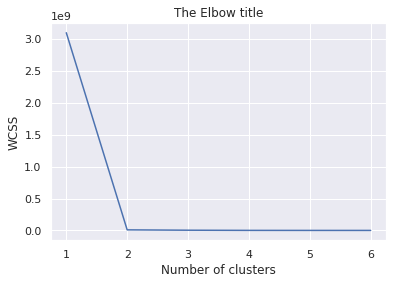

In [ ]:
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x_train)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

The optimum number of clusters is 2

In [ ]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [ ]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

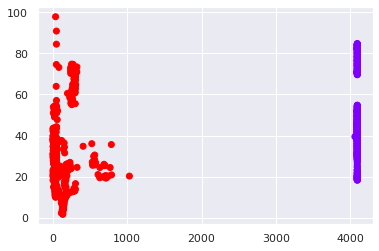

In [ ]:
data_with_clusters = weather_df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['lightDensity (V)'],data_with_clusters['altitude (m)'],c=data_with_clusters['Clusters'],cmap='rainbow')

##Temperature vs Humidity

In [ ]:
y = weather_df[['temperature (C)',"humidity (%)"]] # 1t for rows and second for columns
y

,temperature (C),humidity (%)
1,28.4,67.0
2,28.4,64.3
3,28.4,66.0
4,28.1,65.2
5,27.7,66.1
...,...,...
1062,31.9,53.7
1063,31.9,53.3
1064,32.9,52.4
1065,33.6,51.0


Text(0, 0.5, 'WCSS')

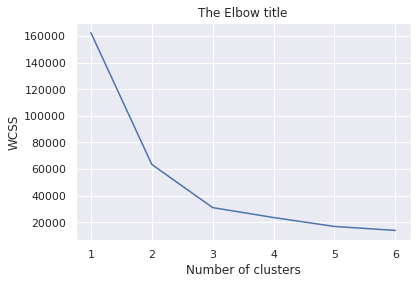

In [ ]:
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(y)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

The optimum number of clusters is 3 as the curve takes a sharp turn at it.

In [ ]:
kmeans = KMeans(3)
kmeans.fit(y)

KMeans(n_clusters=3)

In [ ]:
identified_clusters = kmeans.fit_predict(y)
identified_clusters

array([0, 2, 2, ..., 2, 1, 1], dtype=int32)

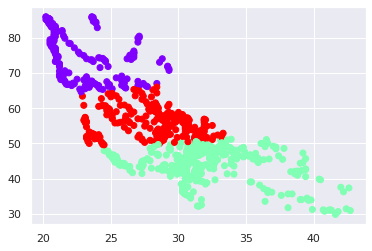

In [ ]:
data_with_clusters = weather_df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['temperature (C)'],data_with_clusters['humidity (%)'],c=data_with_clusters['Clusters'],cmap='rainbow')

##Testing

In [ ]:
test_response={}

for col in x.columns:
    user_input=float(input(f"{col} :  "))
#     print(user_input)
    test_response[col]=user_input

lightDensity (V) :  4093
altitude (m) :  35.3


In [ ]:
test_df = pd.DataFrame(test_response.items()).T
new_header = test_df.iloc[0] #grab the first row for the header
test_df = test_df[1:] #take the data less the header row
test_df.columns = new_header #set the header row as the df header
test_df.reset_index(drop=True, inplace=True)
test_df= test_df.apply(pd.to_numeric)
test_df

,lightDensity (V),altitude (m)
0,4093.0,35.3


In [ ]:
result = kmeans.predict(test_df)
print('My weather prediction cluster: ', result)

My weather prediction cluster:  [1]


### Conclusion

The project implements K-means clustering on the gathered sensor data. The results obtained are as expected.